<a href="https://colab.research.google.com/github/shreyus3003/MLOps/blob/main/mnist_aws.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from keras.datasets import mnist
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
import os
import datetime

%load_ext tensorboard


In [2]:
(train_x, train_y), (test_x, test_y) = mnist.load_data()

11490434/11490434 [==============================] - 2s 0us/step


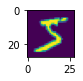

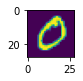

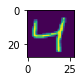

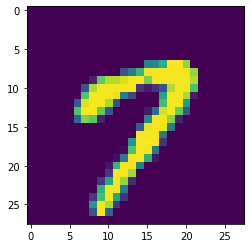

In [3]:
for i in range(3):
  plt.subplot(421)
  plt.imshow(train_x[i])
  plt.show()

plt.imshow(train_x[15])
plt.show()

In [4]:
print(train_x.shape)
train_x.shape[0]

(60000, 28, 28)


60000

In [5]:
# def load_dataset():
(train_x, train_y), (test_x, test_y) = mnist.load_data()
from keras.utils.np_utils import to_categorical
x_train = train_x.reshape((train_x.shape[0], 28,28,1))
x_test = test_x.reshape((test_x.shape[0], 28,28,1))
y_train = to_categorical(train_y)
print(x_train.shape)
y_test = to_categorical(test_y)
# return x_train, x_test, y_train, y_test

(60000, 28, 28, 1)


In [6]:
# def normalize_data(train, test):
train_norm = x_train.astype('float32')
test_norm = x_test.astype('float32')
train_norm = train_norm/255.0
test_norm  = test_norm/255.0
# return train_norm, test_norm


In [7]:
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.layers import BatchNormalization

In [8]:
logdir = os.path.join("logs", datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
tensorboard_callback = tf.keras.callbacks.TensorBoard(logdir, histogram_freq=1)

In [9]:
from tensorflow.python.framework.func_graph import flatten
# def model():
model = Sequential()
# model.add(Conv2D(32, (3,3), activation='relu', kernel_initializer='he_uniform', input_shape=(28,28,1), data_format='channels_first'))
model.add(Conv2D(32, (3,3), activation='relu', kernel_initializer='he_uniform', input_shape=(28,28,1)))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(64, (3,3), activation='relu', kernel_initializer='he_uniform'))
model.add(MaxPooling2D((2,2)))
model.add(Flatten())
model.add(Dense(100, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(10, activation='softmax'))
opt = SGD(learning_rate=0.01, momentum=0.9)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
# return model

In [10]:
# model = model()

In [11]:
# x_train, x_test, y_train, y_test = load_dataset()
# X_train, X_test = normalize_data(x_train, x_test)
X_train = train_norm
X_test = test_norm
model.fit(X_train, y_train, epochs=1, batch_size=32, validation_data=(X_test, y_test), callbacks=[tensorboard_callback])
_, acc = model.evaluate(X_test, y_test)
print(acc)

313/313 [==============================] - 1s 3ms/step - loss: 0.0526 - accuracy: 0.9845
0.984499990940094


In [12]:
# %tensorboard --logdir logs

In [19]:
model.save('clasify.h5')

(28, 28)


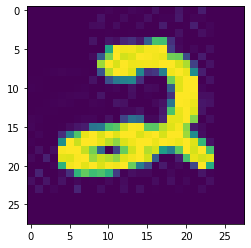

In [25]:

from keras.utils.image_utils import load_img
from tensorflow.keras.models import load_model
img = load_img('/content/img_1.jpeg', grayscale=True, target_size=(28,28))
print(img.size)
plt.imshow(img)
plt.show()

In [26]:
from tensorflow.keras.utils import img_to_array

img = img_to_array(img)
img = img.reshape(1, 28, 28, 1)
img_res = img.astype('float32')
img_res = img_res/255.0

In [27]:
model = load_model('/content/clasify.h5')

In [28]:
import numpy as np

pred = model.predict(img)
digit = np.argmax(pred)
print(digit)

1/1 [==============================] - 0s 110ms/step
2
